# Neural Networks Exercise 6

Amirkabir University of Technology

Dr. Safabakhsh

By Gholamreza Dar 400131018

## Imports

In [10]:
import glob
import datetime

import numpy as np
import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style("dark")

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout, BatchNormalization

## Loading Dataset

In [11]:
file_list = []
for file in glob.glob("dataset\\*.csv"):
    print(file)
    file_list.append(file)

dataset\IRX6XAFF0005.csv
dataset\IRX6XALS0002.csv
dataset\IRX6XS300003.csv
dataset\IRX6XSLC0000.csv
dataset\IRX6XSNT0009.csv
dataset\IRX6XTAL0001.csv
dataset\IRX6XTDP0004.csv
dataset\IRX6XTPI0009.csv
dataset\IRX6XTPI0009[2022-05-23-10-18-57].csv
dataset\IRX6XTPI0025.csv
dataset\IRX6XWAI0001.csv
dataset\IRX6XWTH0001.csv
dataset\IRXWXEXR0007.csv
dataset\IRXWXEXR0023.csv
dataset\IRXWXOCI0001.csv
dataset\IRXWXOCI0027.csv
dataset\IRXYXTPI0009.csv
dataset\IRXYXTPI0025.csv
dataset\IRXZXAGR0009.csv
dataset\IRXZXBNK0006.csv
dataset\IRXZXCMI0000.csv
dataset\IRXZXCML0005.csv
dataset\IRXZXCNS0007.csv
dataset\IRXZXENG0009.csv
dataset\IRXZXEXR0004.csv
dataset\IRXZXEXR0020.csv
dataset\IRXZXFIN0006.csv
dataset\IRXZXFOD0000.csv
dataset\IRXZXHTL0003.csv
dataset\IRXZXIND0008.csv
dataset\IRXZXINS0001.csv
dataset\IRXZXINV0006.csv
dataset\IRXZXITG0009.csv
dataset\IRXZXLSG0005.csv
dataset\IRXZXMIN0007.csv
dataset\IRXZXMML0003.csv
dataset\IRXZXMNF0000.csv
dataset\IRXZXMOT0003.csv
dataset\IRXZXMTL0006.csv
data

In [12]:
df_list = []

# Mini Shakhes
for file in file_list:
    if file != 'dataset\IRX6XTPI0009[2022-05-23-10-18-57].csv':
        df = pd.read_csv(file, encoding='utf-16')
        if df.shape[0] > 20:
            try:
                df.drop(columns=["<TICKER>", "<COl12>", "<COl13>", "<LAST>"], inplace=True)
                df["<DTYYYYMMDD>"] = pd.to_datetime(df["<DTYYYYMMDD>"], format="%Y%m%d")
                df.rename(columns={"<DTYYYYMMDD>": "Date"}, inplace=True)
                df = df[df["Date"] >= "2021-05-23"]
                df.reset_index(inplace=True, drop=True)
                df_list.append(df)
            except Exception as e:
                print("Error in file: " + file)
                print(e)
    
# Shakhes Kol
kol_df = pd.read_csv('dataset/IRX6XTPI0009.csv', encoding='utf-16')
kol_df.drop(columns=["<TICKER>", "<COl12>", "<COl13>", "<LAST>"], inplace=True)
kol_df["<DTYYYYMMDD>"] = pd.to_datetime(kol_df["<DTYYYYMMDD>"], format="%Y%m%d")
kol_df.rename(columns={"<DTYYYYMMDD>": "Date"}, inplace=True)
kol_df = kol_df[kol_df["Date"] >= "2021-05-23"]
kol_df.reset_index(inplace=True, drop=True)

print("Number of non-empty dfs:", len(df_list))

Number of non-empty dfs: 16


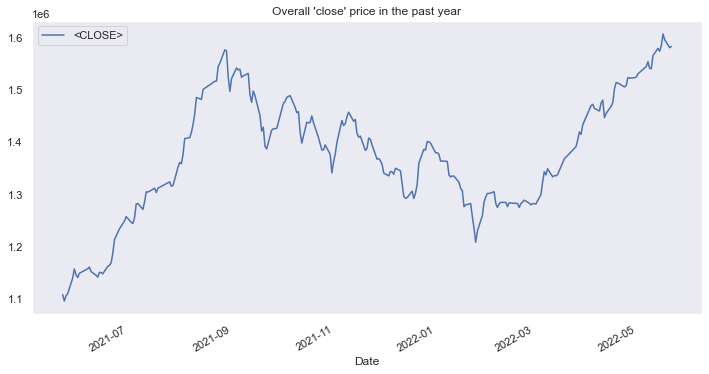

In [13]:
kol_df.plot(x="Date", y="<CLOSE>", figsize=(12, 6), title="Overall 'close' price in the past year")
plt.show()

## Merge Datasets

In [14]:
# Join dfs based on Date column
merged_df = df_list[0]
for idx, df in enumerate(df_list[1:]):
    print(merged_df.shape)
    df = df.add_suffix(f'_{idx+1}', )
    df.rename(columns={f"Date_{idx+1}": "Date"}, inplace=True)
    merged_df = merged_df.merge(df, on='Date', how='outer')

list(merged_df.columns)

(238, 9)
(238, 17)
(238, 25)
(238, 33)
(238, 41)
(238, 49)
(238, 57)
(238, 65)
(238, 73)
(238, 81)
(238, 89)
(238, 97)
(238, 105)
(238, 113)
(238, 121)


['Date',
 '<OPEN>',
 '<HIGH>',
 '<LOW>',
 '<CLOSE>',
 '<VOL>',
 '<OPENINT>',
 '<OPENINT>.1',
 '<OPENINT>.2',
 '<OPEN>_1',
 '<HIGH>_1',
 '<LOW>_1',
 '<CLOSE>_1',
 '<VOL>_1',
 '<OPENINT>_1',
 '<OPENINT>.1_1',
 '<OPENINT>.2_1',
 '<OPEN>_2',
 '<HIGH>_2',
 '<LOW>_2',
 '<CLOSE>_2',
 '<VOL>_2',
 '<OPENINT>_2',
 '<OPENINT>.1_2',
 '<OPENINT>.2_2',
 '<OPEN>_3',
 '<HIGH>_3',
 '<LOW>_3',
 '<CLOSE>_3',
 '<VOL>_3',
 '<OPENINT>_3',
 '<OPENINT>.1_3',
 '<OPENINT>.2_3',
 '<OPEN>_4',
 '<HIGH>_4',
 '<LOW>_4',
 '<CLOSE>_4',
 '<VOL>_4',
 '<OPENINT>_4',
 '<OPENINT>.1_4',
 '<OPENINT>.2_4',
 '<OPEN>_5',
 '<HIGH>_5',
 '<LOW>_5',
 '<CLOSE>_5',
 '<VOL>_5',
 '<OPENINT>_5',
 '<OPENINT>.1_5',
 '<OPENINT>.2_5',
 '<OPEN>_6',
 '<HIGH>_6',
 '<LOW>_6',
 '<CLOSE>_6',
 '<VOL>_6',
 '<OPENINT>_6',
 '<OPENINT>.1_6',
 '<OPENINT>.2_6',
 '<OPEN>_7',
 '<HIGH>_7',
 '<LOW>_7',
 '<CLOSE>_7',
 '<VOL>_7',
 '<OPENINT>_7',
 '<OPENINT>.1_7',
 '<OPENINT>.2_7',
 '<OPEN>_8',
 '<HIGH>_8',
 '<LOW>_8',
 '<CLOSE>_8',
 '<VOL>_8',
 '<OPENINT>_8',

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 237
Columns: 129 entries, Date to <OPENINT>.2_15
dtypes: datetime64[ns](1), float64(106), int64(22)
memory usage: 241.7 KB


In [16]:
merged_df.fillna(0, inplace=True)
merged_df.isna().sum()

Date              0
<OPEN>            0
<HIGH>            0
<LOW>             0
<CLOSE>           0
                 ..
<CLOSE>_15        0
<VOL>_15          0
<OPENINT>_15      0
<OPENINT>.1_15    0
<OPENINT>.2_15    0
Length: 129, dtype: int64

In [17]:
data = merged_df.drop(columns=["Date"])
data = data.reset_index(drop=True)
data = data.to_numpy()

print("Data shape:", data.shape)

Data shape: (238, 128)


## Preprocessing

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, data.shape[1]))

## Create Dataset (Sliding Window)

In [19]:
def create_dataset(dataset, kol_df, time_steps=1):
    data_x, data_y = [], []
    for i in range(len(dataset)-time_steps-1):
        data_x.append(dataset[i:(i+time_steps)])

        # check if the close price is higher than the previous day
        if kol_df["<CLOSE>"].iloc[i+time_steps] > kol_df["<CLOSE>"].iloc[i+time_steps-1]:
            data_y.append(1)
        else:
            data_y.append(0)
            
    return np.array(data_x), np.array(data_y).reshape(-1, 1)

In [20]:
time_steps = 15
x_data, y_data = create_dataset(data, kol_df, time_steps)

print("x_data shape:", x_data.shape)
print("y_data shape:", y_data.shape)

# Note: LSTM requires input shape to be (sample, timesteps, feature_size) in this case: (222, 15, 128)

x_data shape: (222, 15, 128)
y_data shape: (222, 1)


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, stratify=y_data)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.125, stratify=y_train)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_valid shape:", x_valid.shape)
print("y_valid shape:", y_valid.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (154, 15, 128)
y_train shape: (154, 1)
x_valid shape: (23, 15, 128)
y_valid shape: (23, 1)
x_test shape: (45, 15, 128)
y_test shape: (45, 1)


In [22]:
_, counts= np.unique(y_data, return_counts=True)
print("y_data counts:", dict(zip(np.unique(y_train), counts)), f"{round(counts[1]/counts.sum()*100, 3)}% label 1")
_, counts= np.unique(y_train, return_counts=True)
print("y_train counts:", dict(zip(np.unique(y_train), counts)), f"{round(counts[1]/counts.sum()*100, 3)}% label 1")
_, counts= np.unique(y_valid, return_counts=True)
print("y_valid counts:", dict(zip(np.unique(y_valid), counts)), f"{round(counts[1]/counts.sum()*100, 3)}% label 1")
_, counts= np.unique(y_test, return_counts=True)
print("y_test counts:", dict(zip(np.unique(y_test), counts)), f"{round(counts[1]/counts.sum()*100, 3)}% label 1")


y_data counts: {0: 94, 1: 128} 57.658% label 1
y_train counts: {0: 65, 1: 89} 57.792% label 1
y_valid counts: {0: 10, 1: 13} 56.522% label 1
y_test counts: {0: 19, 1: 26} 57.778% label 1


## Experiments

### Single LSTM layer

In [38]:
model = Sequential()
model.add(tf.keras.layers.InputLayer(x_train.shape[1:]))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

print("Model summary:")
model.summary()

print("\n\nTraining...")
model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_valid, y_valid),
    callbacks=[tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))]
    )

print("\n\nEvaulation on test set:")
model.evaluate(x_test, y_test)

Model summary:
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100)               91600     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 91,701
Trainable params: 91,701
Non-trainable params: 0
_________________________________________________________________


Training...
Epoch 1/50
3/3 [==============================] - 3s 330ms/step - loss: 5.2310 - accuracy: 0.4805 - val_loss: 8.7184 - val_accuracy: 0.4348
Epoch 2/50
3/3 [==============================] - 0s 63ms/step - loss: 8.9144 - accuracy: 0.4221 - val_loss: 8.7184 - val_accuracy: 0.4348
Epoch 3/50
3/3 [==============================] - 0s 62ms/step - loss: 8.9144 - accuracy: 0.4221 - val_loss: 8.7184 - val_accuracy: 0.434

[8.912192344665527, 0.42222222685813904]

### Single GRU layer

In [45]:
model = Sequential()
model.add(tf.keras.layers.InputLayer(x_train.shape[1:]))
model.add(GRU(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

print("Model summary:")
model.summary()

print("\n\nTraining...")
model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_valid, y_valid),
    callbacks=[tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))]
    )

print("\n\nEvaulation on test set:")
model.evaluate(x_test, y_test)

Model summary:
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_11 (GRU)                (None, 50)                27000     
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 27,051
Trainable params: 27,051
Non-trainable params: 0
_________________________________________________________________


Training...
Epoch 1/50
3/3 [==============================] - 3s 311ms/step - loss: 8.9144 - accuracy: 0.4221 - val_loss: 8.7184 - val_accuracy: 0.4348
Epoch 2/50
3/3 [==============================] - 0s 69ms/step - loss: 8.9144 - accuracy: 0.4221 - val_loss: 8.7184 - val_accuracy: 0.4348
Epoch 3/50
3/3 [==============================] - 0s 47ms/step - loss: 8.9144 - accuracy: 0.4221 - val_loss: 8.7184 - val_accuracy: 0.434

[8.912192344665527, 0.42222222685813904]

### Stacked LSTM layers

In [58]:
model = Sequential()
model.add(tf.keras.layers.InputLayer(x_train.shape[1:]))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

print("Model summary:")
model.summary()

print("Training...")
model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_valid, y_valid),
    callbacks=[tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))]
    )

print("Evaulation on test set:")
model.evaluate(x_test, y_test)

Model summary:
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 15, 50)            35800     
                                                                 
 lstm_16 (LSTM)              (None, 50)                20200     
                                                                 
 dense_26 (Dense)            (None, 1)                 51        
                                                                 
Total params: 56,051
Trainable params: 56,051
Non-trainable params: 0
_________________________________________________________________
Training...
Epoch 1/50
3/3 [==============================] - 5s 525ms/step - loss: 1.0105 - accuracy: 0.4935 - val_loss: 0.9740 - val_accuracy: 0.5652
Epoch 2/50
3/3 [==============================] - 0s 82ms/step - loss: 1.0124 - accuracy: 0.5779 - val_loss: 0.7010 - val_accuracy: 0.5652
Epoch 3

[1.157779574394226, 0.5333333611488342]

In [47]:
model = Sequential()
model.add(tf.keras.layers.InputLayer(x_train.shape[1:]))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

print("Model summary:")
model.summary()

print("Training...")
model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_valid, y_valid),
    callbacks=[tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))]
    )

print("Evaulation on test set:")
model.evaluate(x_test, y_test)

Model summary:
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 15, 50)            35800     
                                                                 
 lstm_9 (LSTM)               (None, 15, 50)            20200     
                                                                 
 lstm_10 (LSTM)              (None, 50)                20200     
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 76,251
Trainable params: 76,251
Non-trainable params: 0
_________________________________________________________________
Training...
Epoch 1/50
3/3 [==============================] - 7s 822ms/step - loss: 1.0151 - accuracy: 0.4481 - val_loss: 0.7243 - val_accuracy: 0.5652
Epoch 2/50
3/3

[1.1031461954116821, 0.46666666865348816]

In [48]:
model = Sequential()
model.add(tf.keras.layers.InputLayer(x_train.shape[1:]))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

print("Model summary:")
model.summary()

print("Training...")
model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_valid, y_valid),
    callbacks=[tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))]
    )

print("Evaulation on test set:")
model.evaluate(x_test, y_test)

Model summary:
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 15, 50)            35800     
                                                                 
 lstm_12 (LSTM)              (None, 15, 50)            20200     
                                                                 
 lstm_13 (LSTM)              (None, 15, 50)            20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_20 (Dense)            (None, 1)                 51        
                                                                 
Total params: 96,451
Trainable params: 96,451
Non-trainable params: 0
_________________________________________________________________
Training...
Epoch 1/50
3/3 [======

[0.7072196006774902, 0.5111111402511597]

### Stacked GRU layers

In [52]:
model = Sequential()
model.add(tf.keras.layers.InputLayer(x_train.shape[1:]))
model.add(GRU(units=50, return_sequences=True))
model.add(GRU(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

print("Model summary:")
model.summary()

print("Training...")
model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_valid, y_valid),
    callbacks=[tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))]
    )

print("Evaulation on test set:")
model.evaluate(x_test, y_test)

Model summary:
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_21 (GRU)                (None, 15, 50)            27000     
                                                                 
 gru_22 (GRU)                (None, 50)                15300     
                                                                 
 dense_24 (Dense)            (None, 1)                 51        
                                                                 
Total params: 42,351
Trainable params: 42,351
Non-trainable params: 0
_________________________________________________________________
Training...
Epoch 1/50
3/3 [==============================] - 6s 732ms/step - loss: 2.2727 - accuracy: 0.4805 - val_loss: 0.6861 - val_accuracy: 0.6522
Epoch 2/50
3/3 [==============================] - 0s 80ms/step - loss: 0.8437 - accuracy: 0.4740 - val_loss: 1.7432 - val_accuracy: 0.4348
Epoch 3

[0.7539329528808594, 0.5777778029441833]

In [50]:
model = Sequential()
model.add(tf.keras.layers.InputLayer(x_train.shape[1:]))
model.add(GRU(units=50, return_sequences=True))
model.add(GRU(units=50, return_sequences=True))
model.add(GRU(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

print("Model summary:")
model.summary()

print("Training...")
model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_valid, y_valid),
    callbacks=[tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))]
    )

print("Evaulation on test set:")
model.evaluate(x_test, y_test)

Model summary:
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_14 (GRU)                (None, 15, 50)            27000     
                                                                 
 gru_15 (GRU)                (None, 15, 50)            15300     
                                                                 
 gru_16 (GRU)                (None, 50)                15300     
                                                                 
 dense_22 (Dense)            (None, 1)                 51        
                                                                 
Total params: 57,651
Trainable params: 57,651
Non-trainable params: 0
_________________________________________________________________
Training...
Epoch 1/50
3/3 [==============================] - 7s 764ms/step - loss: 2.3569 - accuracy: 0.4870 - val_loss: 1.6419 - val_accuracy: 0.5652
Epoch 2/50
3/3

[0.7397996783256531, 0.6000000238418579]

In [53]:
model = Sequential()
model.add(tf.keras.layers.InputLayer(x_train.shape[1:]))
model.add(GRU(units=50, return_sequences=True))
model.add(GRU(units=50, return_sequences=True))
model.add(GRU(units=50, return_sequences=True))
model.add(GRU(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

print("Model summary:")
model.summary()

print("Training...")
model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_valid, y_valid),
    callbacks=[tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))]
    )

print("Evaulation on test set:")
model.evaluate(x_test, y_test)

Model summary:
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_23 (GRU)                (None, 15, 50)            27000     
                                                                 
 gru_24 (GRU)                (None, 15, 50)            15300     
                                                                 
 gru_25 (GRU)                (None, 15, 50)            15300     
                                                                 
 gru_26 (GRU)                (None, 50)                15300     
                                                                 
 dense_25 (Dense)            (None, 1)                 51        
                                                                 
Total params: 72,951
Trainable params: 72,951
Non-trainable params: 0
_________________________________________________________________
Training...
Epoch 1/50
3/3 [======

[1.6139739751815796, 0.6222222447395325]

## Prediction

In [231]:
model.predict(x_test)[2]

array([0.3667005], dtype=float32)

In [235]:
model.predict(x_test[2].reshape(1, -1, x_test.shape[2]))

array([[0.36670053]], dtype=float32)

In [236]:
y_test[2]

array([1])

## Plot Confusion Matrix

In [94]:
%%timeit
(model.predict(x_test)>0.5)

45.9 ms ± 1.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


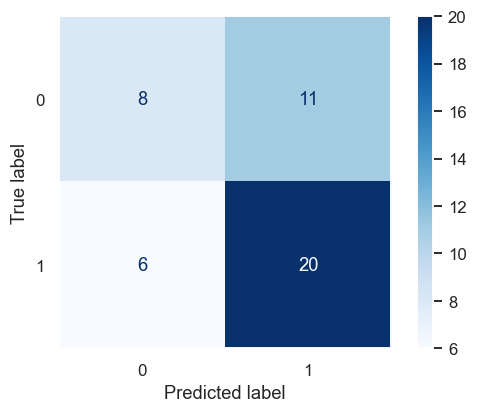

In [54]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test.squeeze(), model.predict(x_test).squeeze()>0.5, display_labels=[0, 1], cmap=plt.cm.Blues,)
disp.figure_.dpi = 110

plt.show()

## Plot the model

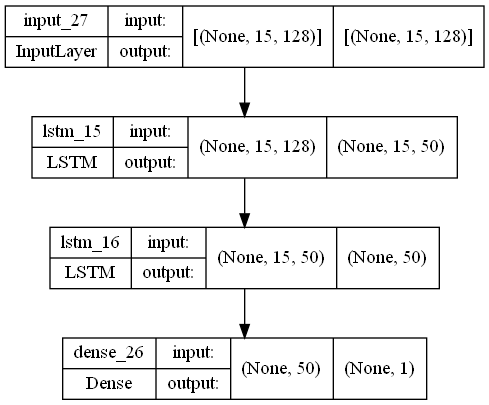

In [59]:
#plot the model
tf.keras.utils.plot_model(model, to_file="modellstmssss.png", show_shapes=True)


## Tensorboard

In [33]:
%load_ext tensorboard

In [34]:
%tensorboard --logdir=logs/

Reusing TensorBoard on port 6006 (pid 12916), started 1 day, 2:29:22 ago. (Use '!kill 12916' to kill it.)

In [156]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [157]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)